# Modelos con variables latentes y repaso del algoritmo K-Means

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg" width="500px" height="300px" />

> **¿Qué significa variable latente?**

> Para responder a esta pregunta, nos remontamos hacia la raiz *latina* etimológica de la palabra latente. Esta palabra viene la palabra en Latín **latens** que significa escondido u oculto.

> En el contexto del modelado probabilístico nos referimos con variables latentes a variables que nunca observamos, pero que (inferimos) están ahí.

> **Objetivos:**
> - Entender qué son las variables latentes y sus aplicaciones.
> - Repasar el algoritmo k-means.


> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

## 1. Variables latentes

### ¿Porqué consideramos variables latentes?

Hay diversas razones por las que permitirnos incluir variables latentes en nuestros modelos cobra muchísima importancia. Algunas de ellas:

1. **No porque no observemos una variable significa que no exista.**

2. **Muchas veces nos permiten conseguir modelos más simples.**

**Ejemplo:**

Una empresa acaba de abrir una posición en el equipo de ciencia de datos. En este sentido, el departamento de RH está interesado en entrevistar a varios candidatos para encontrar a alguien idóneo para la posición.

Para ello, ya se tiene un tabulador que involucra varias variables:
- Grado académico.
- Promedio de calificaciones del último grado académico.
- Entrevista telefónica.
- Entrevista en vivo.

Sin embargo, la entrevista en vivo es un evento que puede llegar a involucrar muchos recursos económicos, y por experiencia, hay varios candidatos que se pueden descartar con solo el conocimiento de las otras variables. La idea es desarrollar un modelo usando datos históricos del departamento de RH:

| Candidato | Grado | Promedio | E. Telefónica | E. Vivo |
| --------- | ----- | -------- | ------------- | ------- |
| 1         | Lic   | 8.4      | 7             | 5       |
| 2         | Maes  | 8.0      | 7             | 6       |
| 3         | Lic   | 9.5      | 8             | 9       |
| 4         | Doc   | 8.9      | 9             | 10      |

Si intentamos establecer un modelo que relacione estas variables, después de revisarlo un poco, llegaríamos a que todas estas variables están relacionadas entre sí, obteniendo un modelo completamente conectado,

![fully_conn](figures/fully_connected.png)

con lo que no tendríamos ni una sola pista de la estructura del modelo, y tendríamos que definir la probabilidad conjunta sobre todas las variables (número exponencial de parámetros).

*Alternativa 1*: considerar un modelo estructurado del tipo

$$
p(x_1, x_2, x_3, x_4) = \frac{\exp\{-w^T x\}}{Z},
$$

con lo que solo tendríamos 5 parámetros $w_0, w_1, w_2, w_3, w_4$. Sin embargo, $Z$ es una constante de normalización que involucra una suma sobre todos los posibles valores de las cuatro variables aleatorias.

*Alternativa 2*: considerar una variable latente de Inteligencia

![latent](figures/latent.png)

con lo que el modelo sería:

$$
p(x_1, x_2, x_3, x_4) = \sum_{I} p(x_1, x_2, x_3, x_4 | I) p(I) = \sum_{I} p(x_1 | I)p(x_2 | I)p(x_3 | I)p(x_4 | I) p(I)
$$

Con esto reducimos notablemente la complejidad del modelo.

3. **Aplicaciones prácticas -> Clustering -> Segmentación de clientes ...**

En aplicaciones clustering pretendemos descubrir segmentaciones en los datos. Esta segmentación la podemos entender como una variable latente.

## 2. Clustering

Probablemente ya hayan escuchado hablar de clustering. Como tal, es de las aplicaciones más importantes en aprendizaje **no supervisado**, y seguramente en un proyecto de análisis de datos no va a pasar más de un mes para cuando necesiten utilizar este tipo de técnicas. Así que vamos a estudiar un par de ellas.

**Ejemplo:**

Los departamentos de créditos en general (personas, pymes, empresarial) normalmente estudian la relación entre ingresos y deuda del candidato a crédito para decidir si acreditan o no a la persona. 

Hay varias heurísticas que se utilizan. Por ejemplo:

- Si las deudas rebasan el 40% del apalancamiento (capital social + ingresos + pasivos), es una empresa de alto riesgo.
- Si las deudas rebasan 3 meses de ingresos, es una empresa de alto riesgo.

Se puede estudiar esta relación, y segmentar a los clientes de acuerdo a su perfil en estas variables.

In [1]:
# Importamos función para generar datos
from bank_customer_data import generate_bank_customer_data
# Importamos pyplot
from matplotlib import pyplot as plt

In [2]:
# Generamos datos
data = generate_bank_customer_data()

In [3]:
data.head(10)

,income,debt,labels
0,2.784242,1.362889,0.0
1,1.592602,2.562608,0.0
2,3.480014,1.563046,0.0
3,4.254610,2.204767,2.0
4,1.000312,5.724966,1.0
5,2.051364,1.143760,0.0
6,3.715297,2.682284,0.0
7,2.142184,2.812753,0.0
8,6.087734,4.938509,2.0
9,1.761891,6.742030,1.0


Text(0, 0.5, 'Deuda (x100k MXN)')

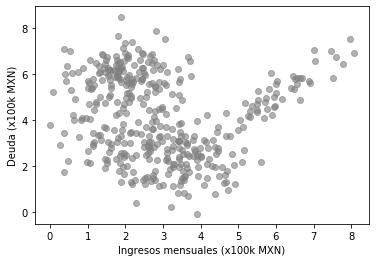

In [7]:
# Datos
plt.scatter(data["income"], data["debt"], c="gray", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Lo que queremos en clustering es identificar los grupos a los que pertenecen cada uno de los clientes.

Text(0, 0.5, 'Deuda (x100k MXN)')

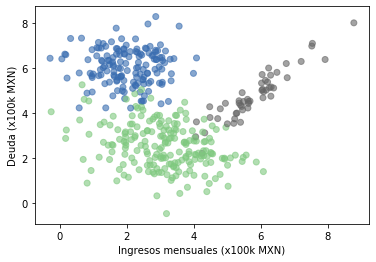

In [4]:
# Grupos "reales"
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Esta idea se conoce como **Hard clustering**; bajo este esquema, identificamos para cada punto un único grupo al que pertenece, es decir:

$$
\text{cluster_id}_x = f(x)
$$

- Los puntos verdes son 100% verdes.
- Los puntos azules son 100% azules.
- Los puntos grises son 100% grises.

Sin embargo, fijemos un momento nuestra atención en los recuadros a continuación ($[2, 3] \times [4, 5]$ y $[4, 5] \times [3, 4]$):

Text(0, 0.5, 'Deuda (x100k MXN)')

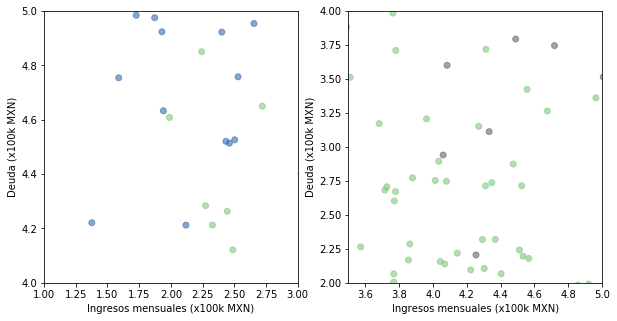

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.axis([1, 3, 4, 5])
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

plt.subplot(1, 2, 2)
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.axis([3.5, 5, 2, 4])
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Desde un punto de vista intuitivo, los puntos en estos sectores no es muy claro a qué grupo pertenecen. Estaríamos tentados a decir que pertenecen a un grupo con cierta probabilidad y con cierta probabilidad a otro.

Esta idea se conoce como **Soft clustering**, y está estrechamente relacionado a **clustering probabilístico**.

$$
p(\text{cluster_id}_x |x)
$$

Al darle un enfoque probabilístico, tenemos varias ventajas colaterales:

- Sintonización de hiperparámetros.
- Modelo generativo.

## 3. Un algoritmo de hard clustering: K-Means

Aunque el K-Means es uno de los algoritmos de hard clustering más conocidos y usados, lo veremos en un par de sesiones más desde una perspectiva probabilística. 

De manera que nos conviene estudiarlo antes.

**Problema:** dado un conjunto de observaciones $x_1, x_2, \dots, x_N \in \mathbb{R}^d$, se debe particionar las $N$ observaciones en $k$ ($\leq N$) clusters $\{1, 2, \dots, k\}$, de manera que se minimice la suma de distancias al cuadrado (varianza).

**Algoritmo:**

1. Inicializar los parámetros $\theta = \{\mu_1, \dots, \mu_k\}$ de manera aleatoria.
2. Repetir hasta la convergencia (hasta que los parámetros no varíen):
   1. Para cada punto calcule el centroide más cercano:
      $$
      c_i = \arg \min_{c} ||x_i - \mu_c||.
      $$
      
   2. Actualizar centroides:
      $$
      \mu_c = \frac{\sum_{i: c_i = c} x_i}{\sum_{i: c_i = c} 1}
      $$

**Tarea:** Programar el algoritmo K-Means.

Nosotros usaremos sklearn durante la clase:

In [6]:
# Importamos sklearn.cluster.KMeans


In [7]:
# Algoritmo de sklearn


In [8]:
# Instanciamos el algoritmo


In [9]:
# Entrenamos


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Deuda (x100k MXN)')

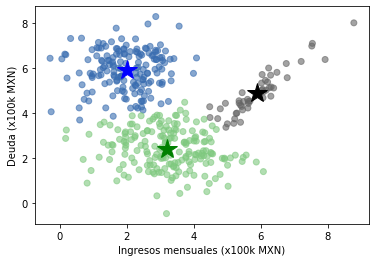

In [10]:
# Gráfico


Todo se ve bien hasta acá. **¿Qué pasa si aumentamos el número de clusters?**

Una métrica que podemos usar para ver qué tan bueno está siendo el agrupado es la suma de las distancias al cuadrado de cada punto a su centroide respectivo:

$$
\frac{1}{N}\sum_{i=1}^N ||x_i - \mu_{c_i}||^2.
$$

In [11]:
# Importamos train/test split y numpy
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
# Distancia al cuadrado promedio
def msd(X, cluster_id, centroids):
    """
    Mean squared distance.
    :param data: Data.
    :param centroids: Centroids.
    :return: Mean squared distance.
    """
    # Number of clusters
    k = centroids.shape[0]
    # Number of points
    N = X.shape[0]
    
    # Distances initialization
    distances = np.zeros(N)
    
    # Compute distances to corresponding cluster
    for j in range(k):
        distances[cluster_id == j] = np.linalg.norm(X[cluster_id == j] - centroids[j, :], axis=1)
        
    return (distances**2).mean()

In [13]:
# Dividimos train/test
X_train, X_test = train_test_split(data[["income", "debt"]], test_size=0.2)

In [ ]:
# Métrica para diferentes números de clusters


Text(0, 0.5, 'Suma de distancias cuadradas')

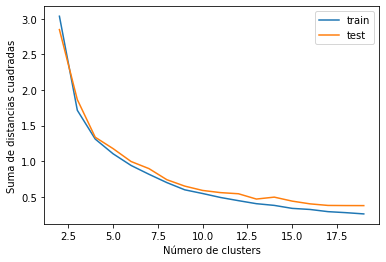

In [15]:
# Gráfico


Como observamos, esta métrica siempre decrece con la cantidad de clusters, lo que hace bastante complejo elegir un número de clusters adecuado cuando este es desconocido.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>